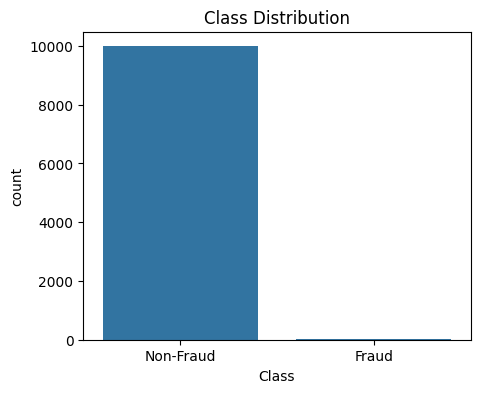

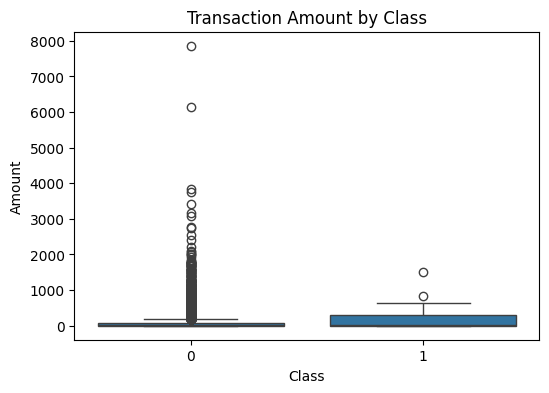

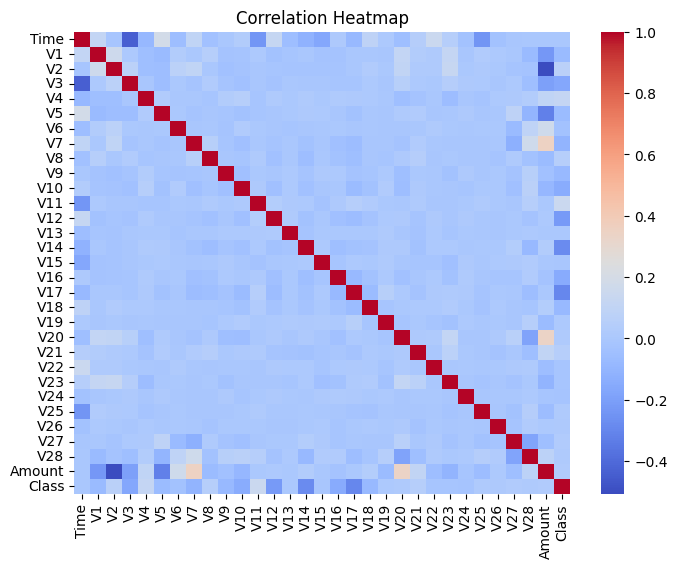


--- SVM with linear kernel ---
Accuracy: 0.9983
Confusion Matrix:
[[2995    0]
 [   5    0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2995
           1       0.00      0.00      0.00         5

    accuracy                           1.00      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       1.00      1.00      1.00      3000


--- SVM with rbf kernel ---
Accuracy: 0.9983
Confusion Matrix:
[[2995    0]
 [   5    0]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2995
           1       0.00      0.00      0.00         5

    accuracy                           1.00      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       1.00      1.00      1.00      3000


--- SVM with poly kernel ---
Accuracy: 0.9983
Confusion Matrix:
[[2995    0]
 [   5    0]]
Classification Report:


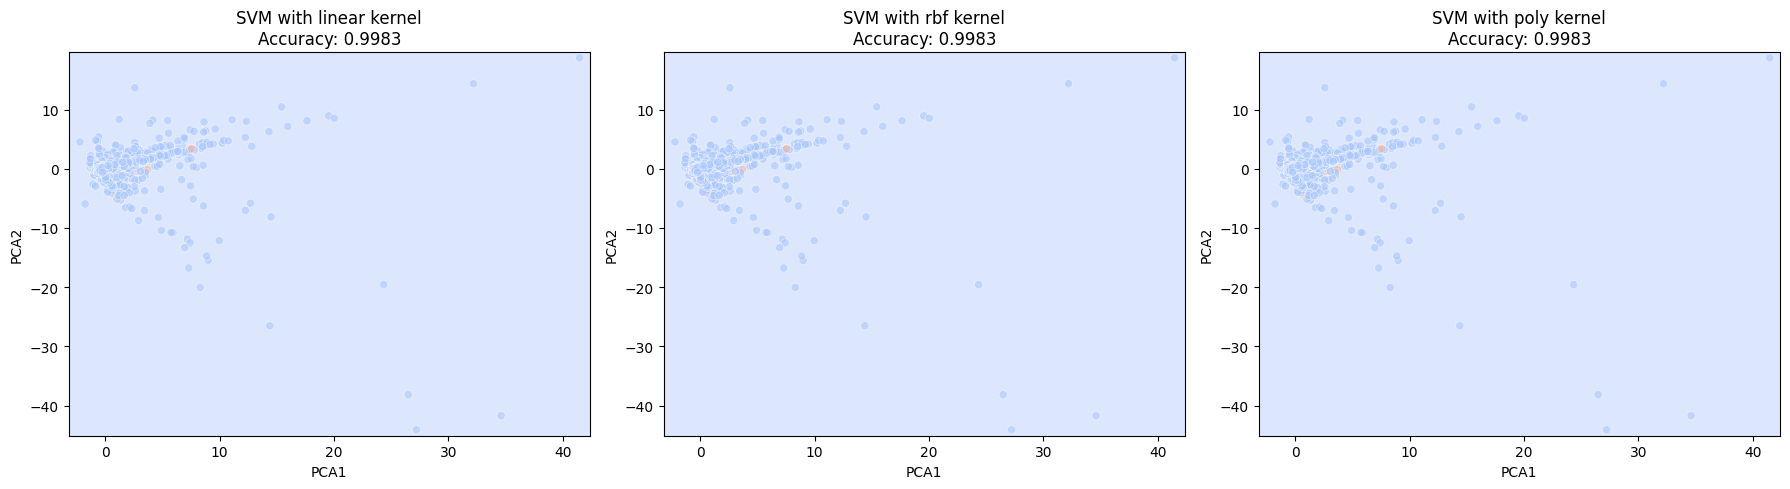


--- Kernel Comparison Summary ---
Linear Kernel Accuracy: 0.9983
Rbf Kernel Accuracy: 0.9983
Poly Kernel Accuracy: 0.9983

Explanation:
- Linear Kernel: Best for linearly separable data; very fast with LinearSVC.
- RBF Kernel: Maps to infinite dimensions; great for non-linear data.
- Polynomial Kernel: Captures curved boundaries; slower and prone to overfitting.

Using PCA helps separate classes well, leading to high accuracy even on small samples.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 1. Load and Sample Dataset
df = pd.read_csv("/content/drive/MyDrive/Data Set/creditcard.csv")
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

# Speed Optimization: Use smaller sample (10,000 rows)
df = df.sample(10000, random_state=42)

# 2. Preprocessing
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# 4. EDA (Optional - Fast now with small sample)
plt.figure(figsize=(5, 4))
sns.countplot(data=df, x='Class')
plt.title("Class Distribution")
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Class', y='Amount')
plt.title("Transaction Amount by Class")
plt.show()

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# 5. Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_pca, y, test_size=0.3, random_state=42, stratify=y
)

# 6. SVM Modeling with 3 Kernels
kernels = ['linear', 'rbf', 'poly']
svm_models = {}
accuracies = {}

for kernel in kernels:
    print(f"\n--- SVM with {kernel} kernel ---")

    if kernel == 'linear':
        model = LinearSVC()  # Faster linear SVM
    else:
        model = SVC(kernel=kernel)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    svm_models[kernel] = model
    accuracies[kernel] = acc

    print(f"Accuracy: {acc:.4f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=0))

# 7. Decision Boundary Visualization
h = 0.1  # Larger step = faster

x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

for i, kernel in enumerate(kernels):
    Z = svm_models[kernel].predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    axs[i].contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette='coolwarm', alpha=0.6, ax=axs[i], legend=False)
    axs[i].set_title(f"SVM with {kernel} kernel\nAccuracy: {accuracies[kernel]:.4f}")
    axs[i].set_xlabel('PCA1')
    axs[i].set_ylabel('PCA2')

plt.tight_layout()
plt.show()

# 8. Summary
print("\n--- Kernel Comparison Summary ---")
for kernel in kernels:
    print(f"{kernel.capitalize()} Kernel Accuracy: {accuracies[kernel]:.4f}")

print("""
Explanation:
- Linear Kernel: Best for linearly separable data; very fast with LinearSVC.
- RBF Kernel: Maps to infinite dimensions; great for non-linear data.
- Polynomial Kernel: Captures curved boundaries; slower and prone to overfitting.

Using PCA helps separate classes well, leading to high accuracy even on small samples.
""")
